<a href="https://colab.research.google.com/github/mwang-cmn/Python-notebooks/blob/main/Prediction_of_Health_Costs_by_Caroline_Mwangi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting Medical Expenses: A Data-Driven Approach for Health Insurance**
## **Introduction**
Accurately predicting medical expenses is a critical challenge in the health insurance industry. Insurers rely on data-driven models to assess risk, price policies fairly, and ensure financial sustainability. Medical costs vary significantly across individuals due to factors such as age, lifestyle choices, and pre-existing health conditions. Understanding these cost drivers enables insurers to design policies that are both competitive and actuarially sound while promoting risk management strategies.

### **Problem Statement**
Medical expenses are influenced by a combination of lifestyle factors (such as smoking and BMI) and demographic attributes (such as age and region). Insurers must balance these factors when pricing health insurance premiums to avoid underpricing high-risk individuals or overcharging low-risk ones. Traditional actuarial methods may not fully capture the non-linear relationships between these variables and medical costs, making predictive modeling essential for better underwriting decisions.

### **Objectives**
This project aims to:

1. Develop predictive models to estimate medical expenses based on demographic and lifestyle factors.

2. Identify the most influential variables affecting health costs, helping insurers refine their risk assessment strategies.

3. Compare different machine learning models to determine the most effective approach for predicting medical expenses.

4. Provide insights into how lifestyle choices (such as smoking and obesity) impact healthcare costs relative to demographic characteristics.

By leveraging statistical and machine learning techniques, this study will contribute to more accurate health cost predictions, aiding insurers and policy holders in risk assessment, policy pricing, and overall financial planning.

In [54]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style="whitegrid", palette="pastel")
import warnings
warnings.filterwarnings("ignore")

In [55]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2025-03-26 19:58:31--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.2.33, 104.26.3.33, 172.67.70.149, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.2.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv.1’

insurance.csv.1     100%[===================>]  49.09K  --.-KB/s    in 0.01s   

2025-03-26 19:58:31 (4.66 MB/s) - ‘insurance.csv.1’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


### Description of Dataset
The dataset has 1338 rows, 6 feature columns and 1 target variable
1. **Age** (int64): Numerical variable representing the
age of an individual.

2. **Sex** (object): Categorical variable indicating the gender of an individual.

3. **BMI** (float64): Numerical variable representing the Body Mass Index (BMI) of an individual.

4. **Smoker** (object): Categorical variable indicating whether an individual is a smoker (Yes/No).

5. **Region** (object): Categorical variable representing the geographic location of an individual, with four possible regions.
6. **Children** (int64): Numerical variable representing the number of children an individual has.

7. **Expenses** (float64): Numerical variable representing the total medical expenses incurred by an individual (in USD). Also the response/target column.


In [56]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [57]:
data = dataset.copy()
data.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [58]:
data.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
expenses,0


In [59]:
data.duplicated().sum()

np.int64(1)

In [60]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

np.int64(0)

**Data Cleaning**

1. There are no null values in each column
2. There is only one duplicated row, which I removed.
3. There are no missing values in each column.

### **Exploratory Data Analysis**

**Univariate Analysis**

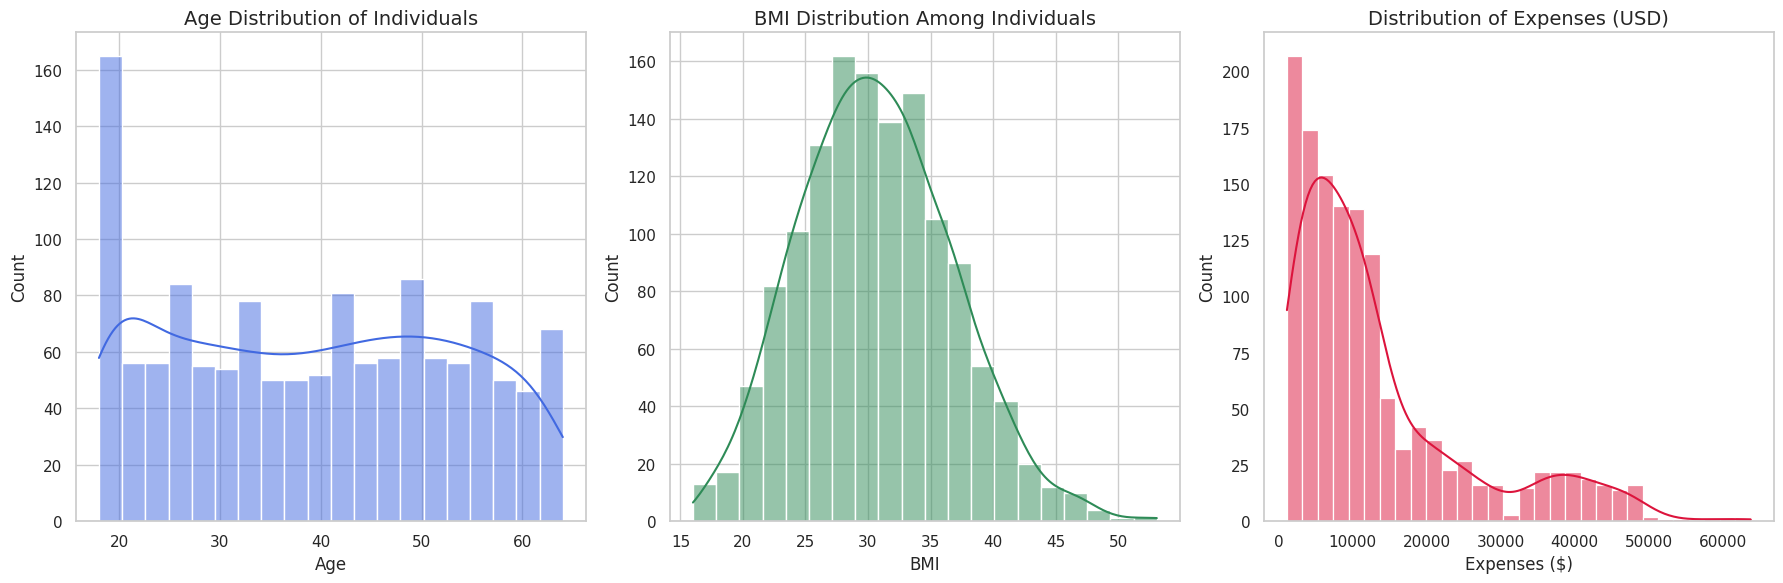

In [61]:
# Univariate Analysis
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Age Distribution
sns.histplot(data['age'], bins=20, kde=True, color='royalblue', ax=axes[0])
axes[0].set_title('Age Distribution of Individuals', fontsize=14)
axes[0].set_xlabel('Age', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)

# BMI Distribution
sns.histplot(data['bmi'], bins=20, kde=True, color='seagreen', ax=axes[1])
axes[1].set_title('BMI Distribution Among Individuals', fontsize=14)
axes[1].set_xlabel('BMI', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)

# Expenses Distribution
sns.histplot(data['expenses'], bins=30, kde=True, color='crimson', ax=axes[2])
axes[2].set_title('Distribution of Expenses (USD)', fontsize=14)
axes[2].set_xlabel('Expenses ($)', fontsize=12)
axes[2].set_ylabel('Count', fontsize=12)

plt.grid(False)
plt.tight_layout()
plt.show()


Investigate the columns for outliers and variability

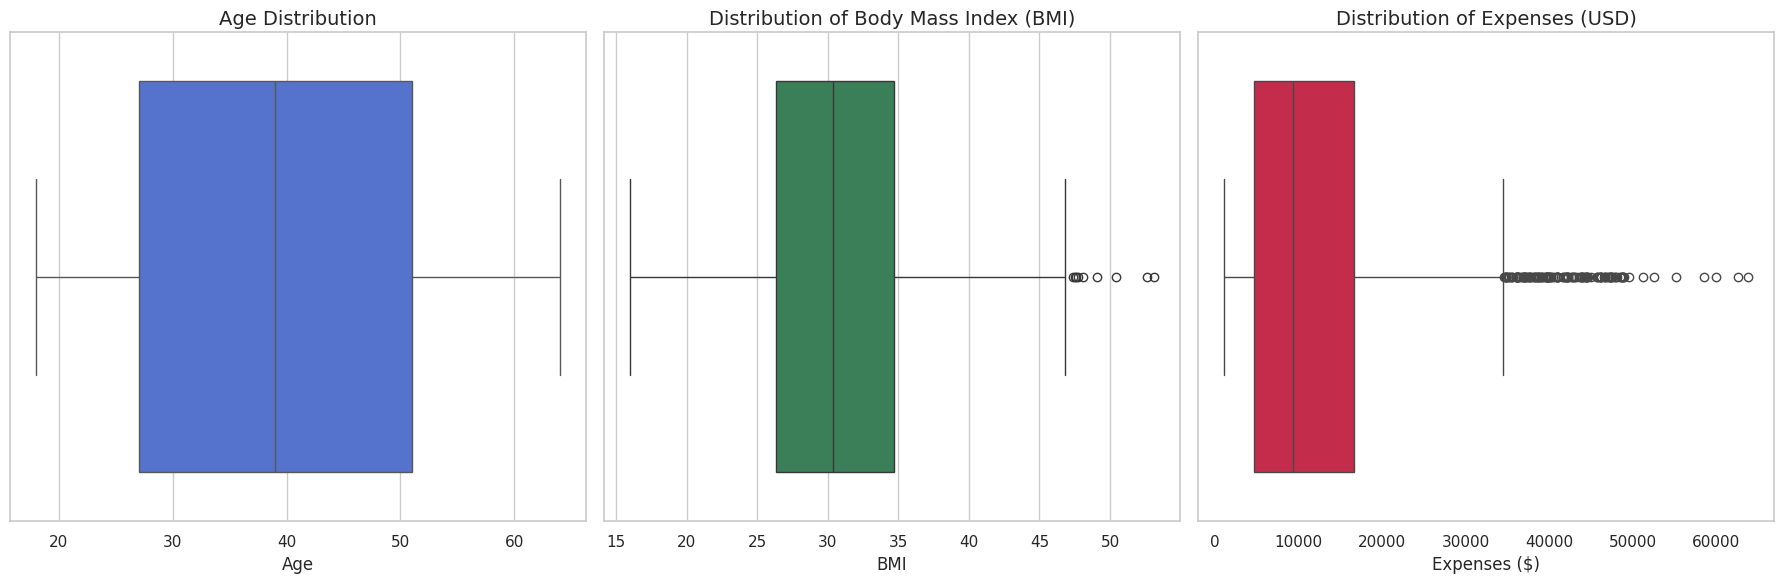

In [62]:
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
colors = ['royalblue', 'seagreen', 'crimson']
sns.boxplot(x=data['age'], color=colors[0], orient='h', ax=axes[0])
axes[0].set_title('Age Distribution', fontsize=14)
axes[0].set_xlabel('Age', fontsize=12)
sns.boxplot(x=data['bmi'], color=colors[1], orient='h', ax=axes[1])
axes[1].set_title('Distribution of Body Mass Index (BMI)', fontsize=14)
axes[1].set_xlabel('BMI', fontsize=12)
sns.boxplot(x=data['expenses'], color=colors[2], orient='h', ax=axes[2])
axes[2].set_title('Distribution of Expenses (USD)', fontsize=14)
axes[2].set_xlabel('Expenses ($)', fontsize=12)
plt.grid(False)
plt.tight_layout()
plt.show()

### **Insights**
1. The age distribution ranges between 18 and 65.The median age is 39 years.50% of the individuals fall between the age of 27 and 51. This column has no outliers.
2. The BMI ranges between 16 to 53. The median BMI is 30.4. There are few outliers in this column. This column is also normally distributed.
3. The Expenses column appears to have many outliers. The column is left skewed. The median expense is about $9382.

Since the expenses column is our target column, The accuracy meetric choosen should be less sensitive to outliers.

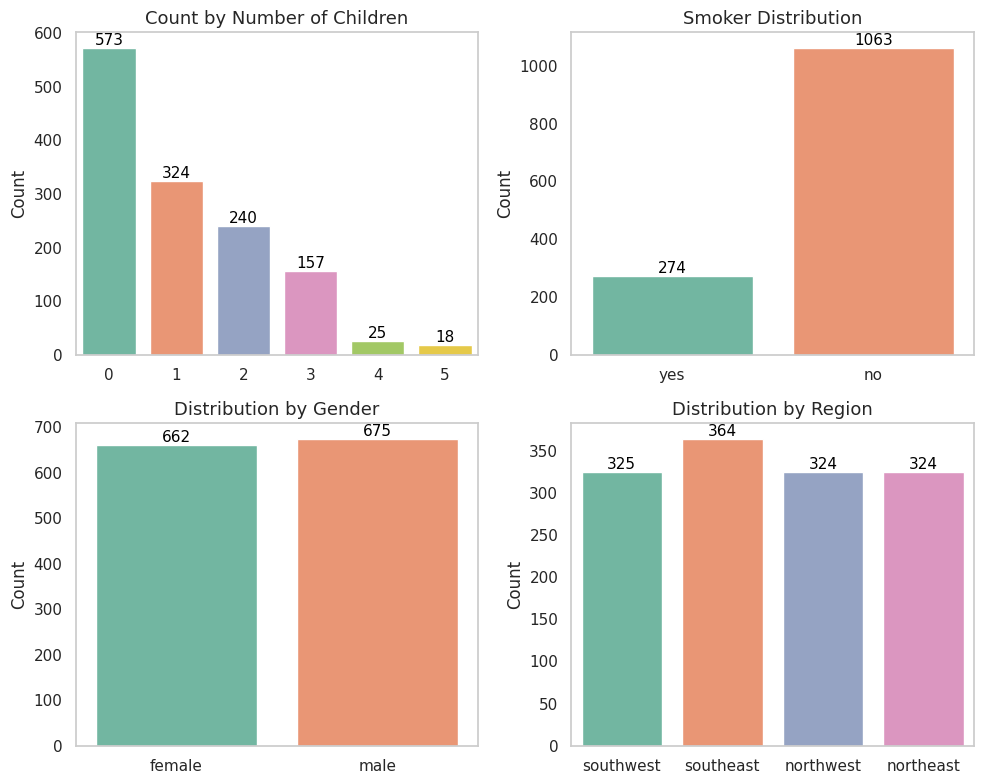

In [95]:
columns = ['children', 'smoker', 'sex', 'region']
titles = ['Count by Number of Children', 'Smoker Distribution', 'Distribution by Gender', 'Distribution by Region']

# Visualise
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
for ax, col, title in zip(axes.flat, columns, titles):
    sns.countplot(x=col, data=data, ax=ax, palette='Set2')
    ax.set_title(title, fontsize=13)
    ax.set_xlabel("")
    ax.set_ylabel("Count")
    ax.grid(False)

    # Annotating bars
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=11, color='black')

plt.tight_layout()
plt.show()

**Bivariate Analysis**

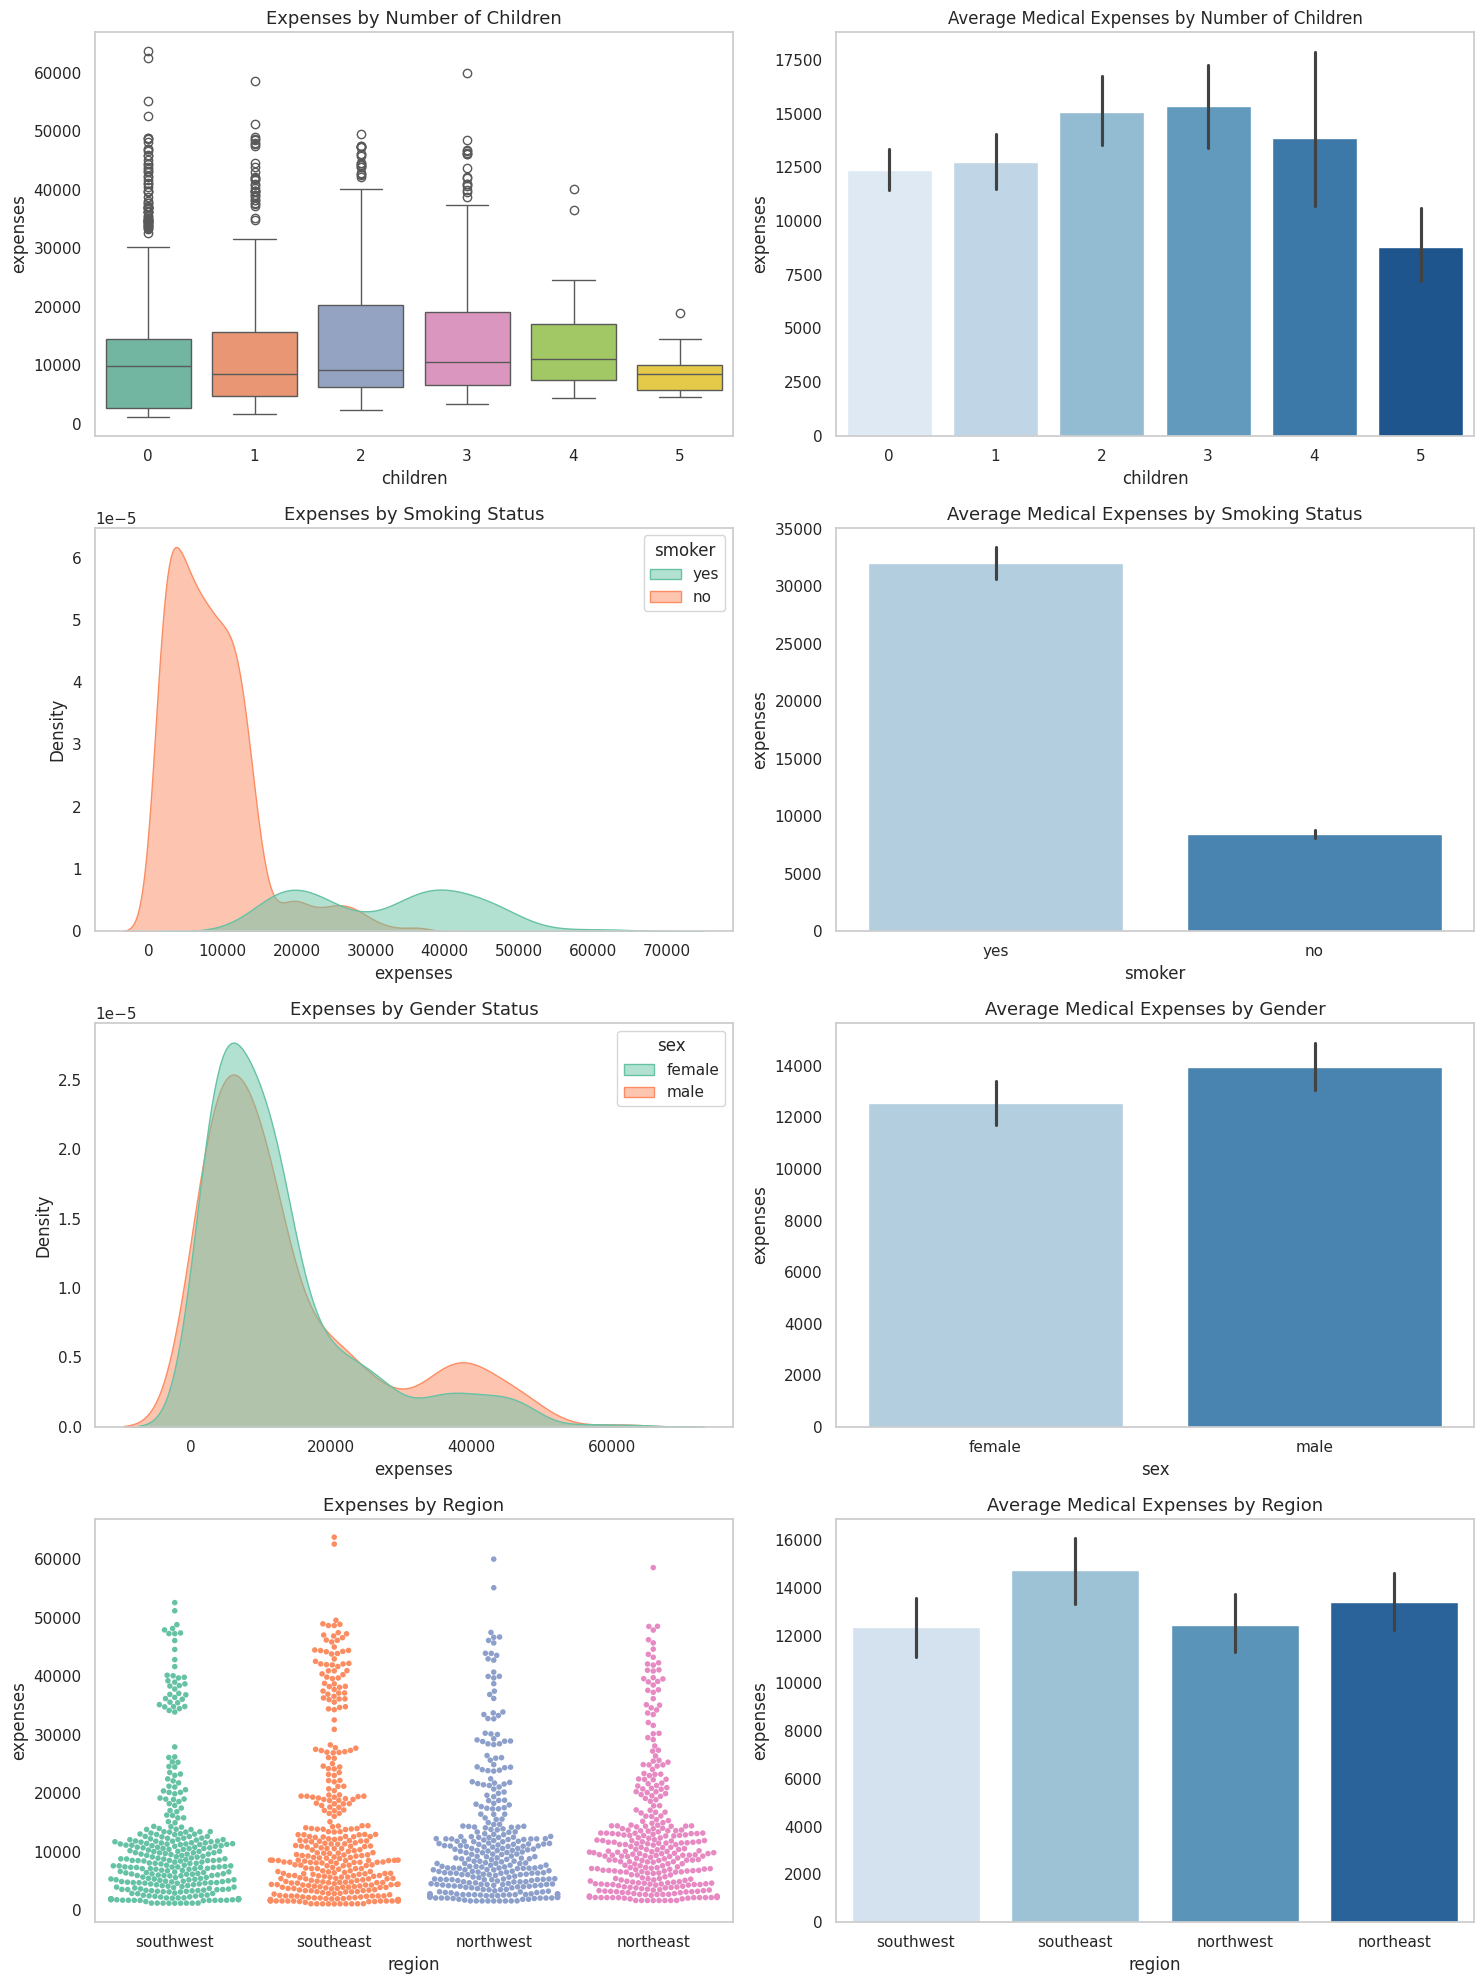

In [91]:
# Multivariate Analysis
fig, axes = plt.subplots(4, 2, figsize=(15, 20))

# 1. Boxplot for Children vs Expenses
sns.boxplot(x='children', y='expenses', data=data, ax=axes[0, 0], palette="Set2")
axes[0, 0].set_title('Expenses by Number of Children', fontsize=13)
axes[0,0].grid(False)

# 2. KdePlot for Smoker vs Expenses
sns.kdeplot(data=data, x="expenses", hue="smoker", fill=True, alpha=0.5, ax=axes[1, 0], palette="Set2")
axes[1, 0].set_title('Expenses by Smoking Status', fontsize=13)
axes[1,0].grid(False)

# 3. Kdeplot for Sex vs Expenses
sns.kdeplot(data=data, x="expenses", hue="sex", fill=True, alpha=0.5, ax=axes[2, 0], palette="Set2")
axes[2,0].set_title('Expenses by Gender Status', fontsize=13)
axes[2,0].grid(False)

# 4. Swarmplot for Region vs Expenses
sns.swarmplot(x='region', y='expenses', data=data, ax=axes[3, 0], palette="Set2", size=4)
axes[3, 0].set_title('Expenses by Region', fontsize=13)
axes[3,0].grid(False)


# 5. Barplot for Mean Expenses by Children
sns.barplot(x='children', y='expenses', data=data, ax=axes[0, 1], estimator=lambda x: x.mean(), palette="Blues")
axes[0, 1].set_title('Average Medical Expenses by Number of Children')
axes[0, 1].grid(False)

# 6. Barplot for Mean Expenses by Smoker
sns.barplot(x='smoker', y='expenses', data=data, ax=axes[1, 1], estimator=lambda x: x.mean(), palette="Blues")
axes[1, 1].set_title('Average Medical Expenses by Smoking Status', fontsize=13)
axes[1, 1].grid(False)

# 7. Barplot for Mean Expenses by Sex
sns.barplot(x='sex', y='expenses', data=data, ax=axes[2,1], estimator=lambda x: x.mean(), palette="Blues")
axes[2, 1].set_title('Average Medical Expenses by Gender', fontsize=13)
axes[2, 1].grid(False)

# 8. Barplot for Mean Expenses by Region
sns.barplot(x='region', y='expenses', data=data, ax=axes[3, 1], estimator=lambda x: x.mean(), palette="Blues")
axes[3, 1].set_title('Average Medical Expenses by Region', fontsize=13)
axes[3, 1].grid(False)

plt.grid(False)
plt.tight_layout()
plt.show()


**Insights**

1. **Gender**: Males spend more on healthcare than females.The average medical expenses appear to be higher for males compared to females.
There is a noticeable gap between the two genders in terms of expenses.

2. **Children**: As the number of children increases, the average medical expenses also seem to rise.However, as the number of dependents increase, the older children, cater for their expenses, reducing the burden on the parents.

3. **Region**: Southeast has the highest costs, Northwest the lowest.Regional differences could be due to variations in healthcare costs or accessibility.

4. **Smokers**: Smokers pay twice as much for medical expenses.The difference is substantial, indicating a possible link between smoking and increased healthcare costs.


**Multivariate Analysis**

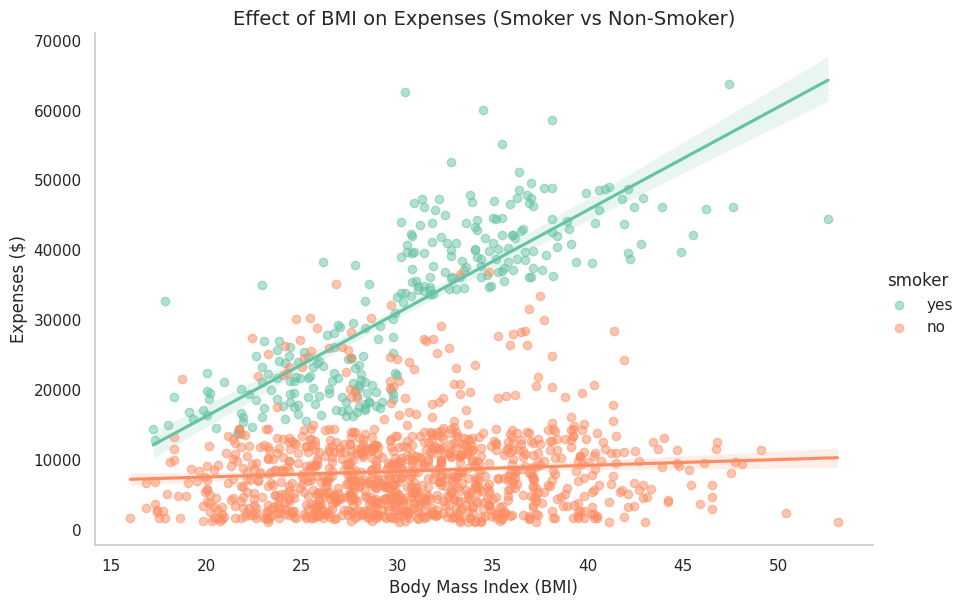

In [93]:
# Create lmplot
sns.lmplot(
    x='bmi', y='expenses', hue='smoker',
    data=data, height=6,
    aspect=1.5, scatter_kws={'alpha': 0.5},
    palette="Set2"
)
plt.title('Effect of BMI on Expenses (Smoker vs Non-Smoker)', fontsize=14)
plt.xlabel('Body Mass Index (BMI)', fontsize=12)
plt.ylabel('Expenses ($)', fontsize=12)
plt.grid(False)
plt.show()

#### **Insights**

- **Smokers vs Non-Smokers (Impact on expenses):**

Smokers (orange points) generally have much higher medical expenses compared to non-smokers (green points).
The regression line for smokers has a steeper upward slope, indicating that as BMI increases, expenses rise significantly for smokers. Non-smokers have a flatter regression line, meaning BMI has less impact on their medical costs.

- **BMI and Expenses Relationship:**

For smokers: Higher BMI strongly correlates with increased expenses. This suggests that obesity combined with smoking exponentially raises medical costs.
For non-smokers: BMI has a weaker impact on expenses. Even at high BMI, their medical costs remain comparatively lower.

- **Medical Cost Disparity:**

There is a clear cost gap between smokers and non-smokers, regardless of BMI. This indicates that smoking alone is a major cost driver in medical expenses.
Some non-smokers with high BMI still have moderate expenses, showing that BMI alone doesn’t explain cost variations as much as smoking does.

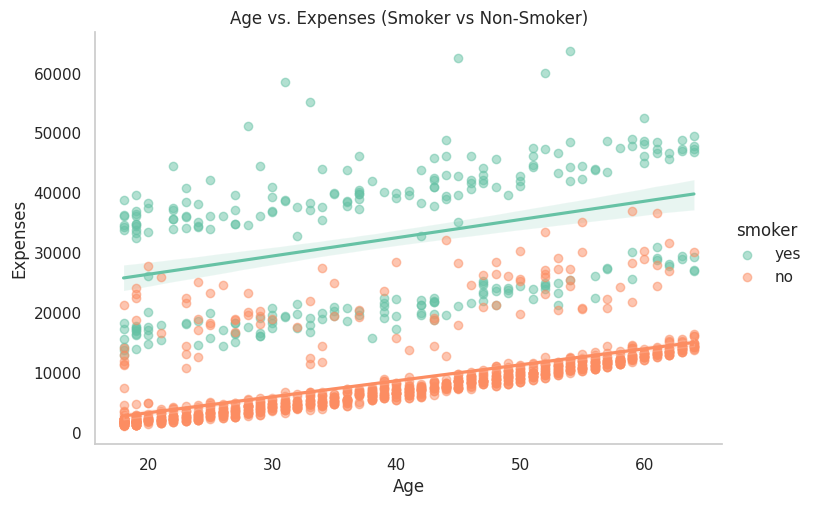

In [94]:
sns.lmplot(x="age", y="expenses", hue="smoker", data=data,
           aspect=1.5, scatter_kws={'alpha': 0.5},
    palette="Set2")
# Add labels and title
plt.xlabel("Age")
plt.ylabel("Expenses")
plt.title("Age vs. Expenses (Smoker vs Non-Smoker)")
plt.grid(False)
plt.show()

**Insights**

**Smokers Incur Higher Expenses**

The orange regression line (smokers) is consistently above the green one (non-smokers), showing that smokers have significantly higher medical expenses at all ages.
The expenses for smokers start high and increase steadily with age.

**Non-Smokers Have Lower & More Stable Expenses**

Non-smokers exhibit a lower expense trend, with fewer extreme values.
The regression line for non-smokers has a gentler slope, indicating a slower rate of expense increase with age.

**Expense Variability is Higher for Smokers**

Smokers have a wider spread in expenses, with many outliers above $50,000.
Non-smokers have a more concentrated expense distribution with fewer extreme values.

**Age Has a Positive Correlation with Expenses**

Both groups show an increasing trend in expenses as age increases.
The increase is more pronounced for smokers, meaning health costs for smokers rise more sharply with age.

The financial burden of healthcare escalates with age, but the effect is significantly amplified for smokers.
The presence of high-cost outliers among smokers suggests that some individuals incur extremely high medical expenses, possibly due to severe smoking-related health issues.

<Figure size 1000x600 with 0 Axes>

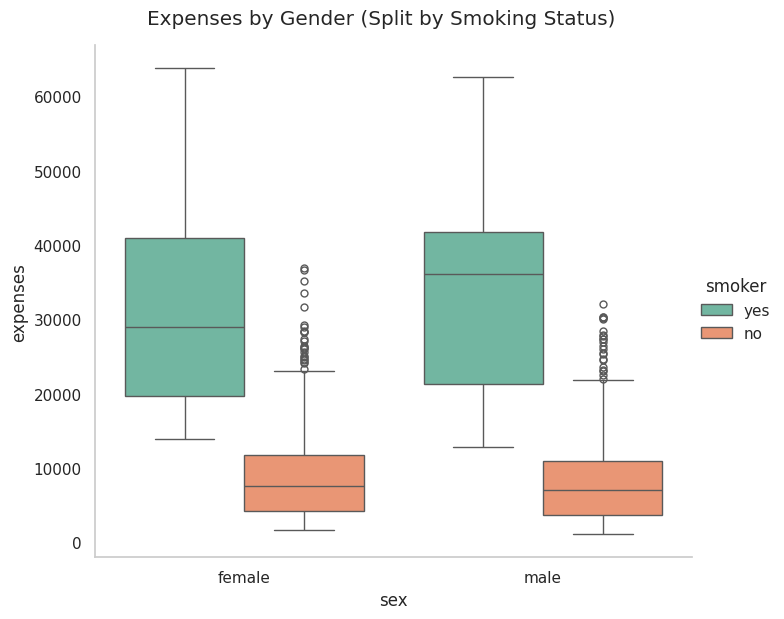

In [92]:
#  Sex vs Expenses with Smoker as hue
plt.figure(figsize=(10, 6))
g1 = sns.catplot(x="sex", y="expenses", hue="smoker",
                 data=data, kind="box", height=6, aspect=1.2, palette="Set2")
g1.fig.suptitle("Expenses by Gender (Split by Smoking Status)", y=1.03)
plt.grid(False)
plt.show()


**Observations**
- Smokers have significantly higher expenses than non-smokers across both genders.
- Non-smokers have lower expenses, with a narrower interquartile range (IQR), meaning their expenses are more predictable.
- Outliers are more prominent among smokers, showing that some individuals incur exceptionally high medical costs.
- Median expenses for smokers are nearly **3 times higher** than those of non-smokers, for both males and females.
- The overall expense distribution is similar for males and females, but both genders see a sharp increase in medical costs when they are smokers.

---

**Insights**
1. **Smoking Drives Up Healthcare Costs:**  
   - Smokers have a wider spread of medical expenses, with higher median costs and more extreme outliers.
   - This suggests that smoking-related illnesses (e.g., respiratory diseases, cardiovascular conditions) significantly increase medical expenditures.

2. **Gender Differences in Expenses are Minimal Among Smokers:**  
   - The expense distribution is fairly similar between male and female smokers, suggesting that smoking impacts healthcare costs regardless of gender.
   - However, female smokers seem to have slightly lower median expenses compared to male smokers.

3. **Non-Smokers Have Lower and More Predictable Costs:**  
   - Non-smokers have a much narrower range of expenses, indicating that their medical costs are more stable.
   - The few outliers among non-smokers may be due to non-smoking-related chronic conditions or accidents.


Insurance companies may charge **higher premiums for smokers** due to their higher and more unpredictable medical costs. Preventive health policies and smoking cessation programs could significantly reduce healthcare expenses at a regional and individual level.

---

### **Data Preprocessing**
I will label encode the sex and smoker columns to prepare them for modelling.
Since I will use a tree based model, I will apply one-hot encoding for the region column.This will create three new columns (region_northwest, region_southeast, region_southwest), while automatically dropping region_northeast to avoid **multicollinearity**.

In [68]:
health = data.copy()
# label encode categorical columns

from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
# Male: 1, Female: 0 - Sex
health['sex'] = label.fit_transform(health['sex'])
# Yes: 1, No: 0 - Smoker
health['smoker'] = label.fit_transform(health['smoker'])
health = pd.get_dummies(health, columns=['region'], drop_first=True)
health.head()


,age,sex,bmi,children,smoker,expenses,region_northwest,region_southeast,region_southwest
0,19,0,27.9,0,1,16884.92,False,False,True
1,18,1,33.8,1,0,1725.55,False,True,False
2,28,1,33.0,3,0,4449.46,False,True,False
3,33,1,22.7,0,0,21984.47,True,False,False
4,32,1,28.9,0,0,3866.86,True,False,False


### **Feature Engineering**

Categorizing BMI and age aligns with established medical guidelines used to assess health risks. BMI classifications are based on World Health Organization (WHO) standards, where underweight individuals may face nutritional deficiencies, while overweight and obese individuals are at higher risk for cardiovascular diseases, diabetes, and joint problems. I will use the following categories to create the **bmi_category** column:

| BMI Range   | Category     |  
|------------|-------------|  
| 0 - 18.5   | Underweight |  
| 18.5 - 24.9 | Healthy     |  
| 25 - 29.9  | Overweight  |  
| 30 - 100   | Obese       |  


Age grouping reflects different life stages where health risks and medical expenses typically increase. Young adults generally have **lower** healthcare costs, while **middle-aged and senior** groups face **higher risks** of chronic conditions like hypertension and diabetes. These categories help models better capture non-linear relationships between age, BMI, and expenses. I will use the following categories to create the **age_group** column:

| Age Range | Category      |
|-----------|-------------|
| 0 - 25    | Young Adult  |
| 26 - 40   | Adult        |
| 41 - 64   | Middle Aged  |
| 65 - 100  | Senior       |



In [69]:
# Create BMI categories
health['bmi_category'] = pd.cut(health['bmi'], bins=[0, 18.5, 24.9, 29.9, 100], labels=['Underweight', 'Healthy', 'Overweight', 'Obese'])
# Create age groups
health['age_group'] = pd.cut(health['age'], bins=[0, 25, 40, 64, 100], labels=['Young Adult', 'Adult', 'Middle Aged', 'Senior'])
health = health.drop(['age', 'bmi'], axis=1)
health.head()


,sex,children,smoker,expenses,region_northwest,region_southeast,region_southwest,bmi_category,age_group
0,0,0,1,16884.92,False,False,True,Overweight,Young Adult
1,1,1,0,1725.55,False,True,False,Obese,Young Adult
2,1,3,0,4449.46,False,True,False,Obese,Adult
3,1,0,0,21984.47,True,False,False,Healthy,Adult
4,1,0,0,3866.86,True,False,False,Overweight,Adult


Since both bmi_category and age_group have an inherent order, they should be ordinally encoded. I will use pd.Categorical with ordered categories and .cat.codes for numerical transformation.

Encoding Approach:

- Underweight (0) < Healthy (1) < Overweight (2) < Obese (3)

- Young Adult (0) < Adult (1) < Middle Aged (2) < Senior (3)

In [70]:

# Ordered categories
bmi_order = ['Underweight', 'Healthy', 'Overweight', 'Obese']
age_order = ['Young Adult', 'Adult', 'Middle Aged', 'Senior']
# Convert categorical columns to ordered type
health['bmi_category'] = pd.Categorical(health['bmi_category'], categories=bmi_order, ordered=True)
health['age_group'] = pd.Categorical(health['age_group'], categories=age_order, ordered=True)
# Encode as numerical values
health['bmi_category_encoded'] = health['bmi_category'].cat.codes
health['age_group_encoded'] = health['age_group'].cat.codes
health.drop(['bmi_category', 'age_group'], axis=1, inplace=True)
# Final Dataset
health.head()


,sex,children,smoker,expenses,region_northwest,region_southeast,region_southwest,bmi_category_encoded,age_group_encoded
0,0,0,1,16884.92,False,False,True,2,0
1,1,1,0,1725.55,False,True,False,3,0
2,1,3,0,4449.46,False,True,False,3,1
3,1,0,0,21984.47,True,False,False,1,1
4,1,0,0,3866.86,True,False,False,2,1


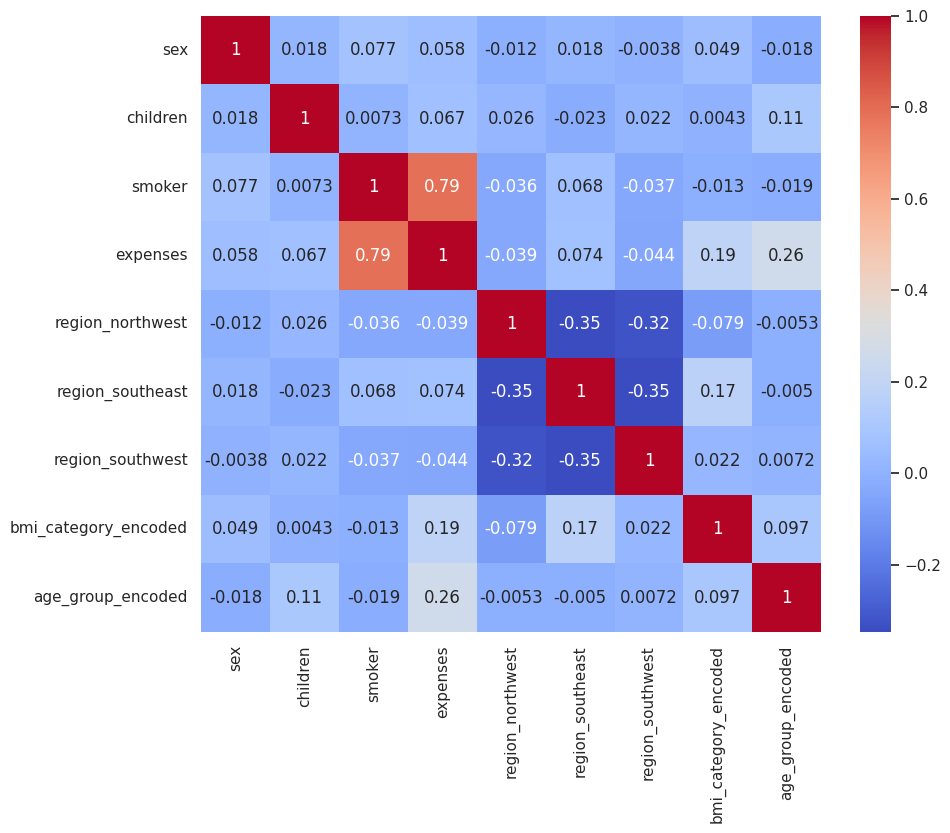

In [71]:
# Check for Collinearity
health.corr()
# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(health.corr(), annot=True, cmap='coolwarm')
plt.show()


## Machine Learning Model and Training.
I will train an test 3 models on the final datasets.
1. Linear Regression
2. Lasso Regression
3. Random Forest Regression Model.

**Metrics.**

Our EDA analysis revealed outliers in the target variable, I will be using the **Mean Absolute error (MAE)** as the accuracy metric for the models. The Mean Absolute Error measures how much the predicted medical expenses **deviate** from the actual expenses in absolute dollar amounts. The MAE provides a margin of error which is important especially in health insurance pricing, an insurer or policymaker wants to know the typical margin of error when estimating expenses. A lower MAE is therefore, a favourable outcome.

I will also calculate the **co-efficient of determination (R²)**. This metric  shows how well the model explains variance in medical expenses. A poor/low R² , indicates that the model does not expain much in terms of variance in expenses.

### **Linear Regression.**
A Linear Regression model is a suitable choice for this project because it provides a straightforward, interpretable relationship between predictors (age, BMI, smoker status, etc.) and medical expenses. Given that medical costs often increase predictably with risk factors like obesity and smoking, a linear approach can capture these trends effectively

In [72]:
X = health.drop('expenses', axis=1)
y = health['expenses']


In [73]:
# Import Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [75]:
# Make predictions
y_pred = model.predict(X_test)
# Get coefficients
model.coef_

array([ -51.13954017,  519.56323916, 9216.57724152, -194.96081701,
       -275.6890775 , -341.58089775, 2136.3515717 , 2882.89029633])

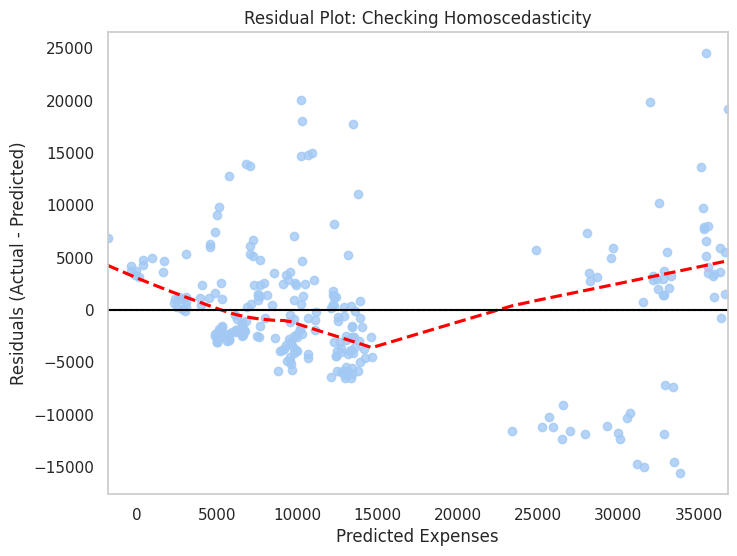

In [76]:
# Residual Plot
plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred, y=y_test - y_pred, lowess=True, line_kws={'color': 'red', 'linestyle': '--'})

# Labels and Title
plt.xlabel("Predicted Expenses")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot: Checking Homoscedasticity")
plt.axhline(y=0, color='black', linestyle='-')
plt.grid(False)
plt.show()

The residuals are scattered across the entire plot and the Lowess (Locally Weighted Scatterplot Smoothing) curve (in red) is significantly curved, indicating non-linearity in the model.

In [77]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R-squared of Linear Regression model is: {r2}")
print(f"Mean Absolute Error of Linear Regression Model is: {mae}")

R-squared of Linear Regression model is: 0.781938356110578
Mean Absolute Error of Linear Regression Model is: 4694.902381186965


**Insights**

The MAE of this model is $4495 dollars indicating a significant margin of error, which is not suitable. The model also explains only 78% variance in expenses.  

**2. Lasso Regression**

Lasso regression is a linear model that incorporates an L1 penalty to both regularize the model and perform feature selection. By adding a penalty proportional to the absolute values of the coefficients, Lasso effectively shrinks less important coefficients to zero, thus simplifying the model and reducing overfitting.

In [78]:
# Initialize and train the Lasso model
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

# Make predictions
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate the model
r2_lasso = r2_score(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)

print(f"Lasso R-squared: {r2_lasso}")
print(f"Lasso Mean Absolute Error: {mae_lasso}")


Lasso R-squared: 0.7819350469542498
Lasso Mean Absolute Error: 4694.915673004528


**Results**

The lasso model also explains about 78% variance in expenses and since it is a linear model, the MAE is also almost similar to the Linear Regression Model.

**3. Random Forest Model**

A Random Forest model  is a powerful ensemble learning method that can handle non-linear relationships and feature interactions more effectively than linear models. Unlike the Linear or Lasso Regression, which assume a linear relationship between features and expenses, Random Forest can capture complex patterns in the data without requiring feature transformations. Additionally, it is robust to outliers,a key advantage given that expenses exhibit high variance.

In [79]:

# Initialize and train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print(f"Random Forest R-squared: {r2_rf}")
print(f"Random Forest Mean Absolute Error: {mae_rf}")


Random Forest R-squared: 0.8359962707568172
Random Forest Mean Absolute Error: 3405.3903295522664


The Random Forest Regression model has improved performance with R-squared at 84%. The MAE has also significantly reduced to $3405. I will tune the paramenters of this model and attempt to improve the model.

**Hyperparameter Tuning (RandomSearchCV)**

In [80]:
# obtain parameters
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [81]:
# Tuning
# Define the parameter grid for RandomForestRegressor
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [5,10, 15],
    'min_samples_leaf': [1, 2, 4],
    'max_features': range(2, 11),
    'min_samples_split': range(2, 11)

}

rf_model_tuned = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid, cv=5, scoring='neg_mean_absolute_error')
rf_model_tuned.fit(X_train, y_train)
params_rf = rf_model_tuned.best_params_
params_rf



{'n_estimators': 200,
 'min_samples_split': 3,
 'min_samples_leaf': 2,
 'max_features': 9,
 'max_depth': 5}

I will use the parameters choosen to fit in my final model.

In [82]:
rf = RandomForestRegressor(n_estimators=params_rf['n_estimators'],
                           max_depth=params_rf['max_depth'],
                           min_samples_split=params_rf['min_samples_split'],
                           min_samples_leaf = params_rf['min_samples_leaf'],
                           max_features = params_rf['max_features'])
rf.fit(X_train, y_train)
y_pred_rf2 = rf.predict(X_test)
r2_best_rf2 = r2_score(y_test, y_pred_rf2)
mae_best_rf2 = mean_absolute_error(y_test, y_pred_rf2)

In [83]:
print(f"Best Random Forest R-squared: {r2_best_rf2}")
print(f"Best Random Forest Mean Absolute Error: {mae_best_rf2}")

Best Random Forest R-squared: 0.8788786658928367
Best Random Forest Mean Absolute Error: 2979.555739700549


In [84]:
X.columns

Index(['sex', 'children', 'smoker', 'region_northwest', 'region_southeast',
       'region_southwest', 'bmi_category_encoded', 'age_group_encoded'],
      dtype='object')

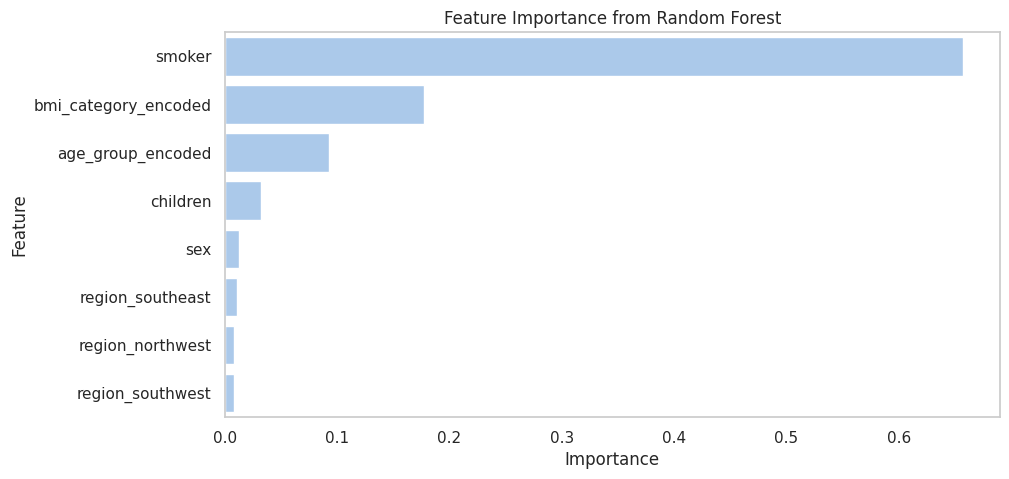

In [89]:
feature_names = ['sex', 'children', 'smoker', 'region_northwest', 'region_southeast',
                 'region_southwest', 'bmi_category_encoded', 'age_group_encoded']

importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'])
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid(False)
plt.show()

In [86]:
feature_importance_df

,Feature,Importance
2,smoker,0.657062
6,bmi_category_encoded,0.177513
7,age_group_encoded,0.092958
1,children,0.031861
0,sex,0.012758
4,region_southeast,0.011265
3,region_northwest,0.008595
5,region_southwest,0.007988


**Insights**

1. **Smoking** status is the **most** influential factor in predicting medical expenses, aligning with known health risks and higher treatment costs for smokers.

2. **BMI category** is the second most important feature, indicating that obesity and related health conditions significantly impact expenses.

3. **Age group** ranks third, showing that older individuals generally have higher medical costs due to increased health risks.

4. **Number of children** has a minor effect, suggesting that dependents do not significantly alter individual medical costs.

Sex and region have minimal influence, implying that demographic factors do not drive expenses as strongly as lifestyle and health-related variables.

Overall, **lifestyle factors** (smoking and BMI) are the strongest cost determinants, reinforcing their role in healthcare expense prediction models.

In [87]:
# Store model results in a dictionary
results = {
    "Model": ["Linear Regression", "Lasso Regression", " Tuned Random Forest"],
    "MAE": [mae, mae_lasso, mae_best_rf2],
    "R-Squared": [r2, r2_lasso, r2_best_rf2]
}
results_df = pd.DataFrame(results)

print(results_df)

                  Model          MAE  R-Squared
0     Linear Regression  4694.902381   0.781938
1      Lasso Regression  4694.915673   0.781935
2   Tuned Random Forest  2979.555740   0.878879


**Results**

The tuned Random Forest model is performing well. The R-squared of the model is approximately 0.8789, the model explains around 89% of the variance in health expenses.
The Mean Absolute Error (MAE) of this model is approximately $2979, which is a significant improvement from the Linear and regression Model.

Summary of Model Performance:

|       Model         |      MAE      | R-Squared |
|---------------------|--------------|-----------|
| Linear Regression  | 4694.902381  | 0.781938  |
| Lasso Regression   | 4694.91573  | 0.781935  |
| Tuned Random Forest|  2979.555740  | 0.878879  |

## **Conclusion**
In this project, I explored multiple regression models to predict medical expenses based on patient demographics and health-related attributes. I began with a Linear Regression model, which provided a baseline performance but struggled with capturing complex relationships. Lasso Regression was introduced to improve feature selection, but the performance remained similar to the linear model. Finally, I implemented a Tuned Random Forest model, which significantly improved performance, achieving a lower MAE and a higher R-squared score, indicating better predictive accuracy.

The results suggest that non-linear relationships exist between the features and medical expenses, making tree-based models like Random Forest more effective. Future improvements could include hyperparameter tuning, incorporating additional features, or experimenting with boosting algorithms like XGBoost for further performance gains.

### **Recommendations**  

Based on the findings, here are some recommendations:

1. **Smarter, Fairer Pricing for Insurance Policies**  
   - smoking and **BMI category emerged as the biggest cost drivers, therefore insurers should adjust premiums based on these risk factors.  
   - Offering premium renewal discounts for non-smokers and individuals maintaining a healthy weight could encourage better lifestyle choices while keeping insurance fair and cost-effective.  

2. **Empowering People to Make Healthier Choices**  
   - Since lifestyle factors heavily influence medical costs, insurers should go beyond just pricing and invest in preventive health programs.  
   - Wellness initiatives, including smoking cessation and fitness incentives, can help policyholders manage risks before they turn into high medical expenses.  

3. **Fine-Tuning Risk Assessment Strategies**  
   - Contrary to relying on broad demographic factors like region or sex, insurers should focus on individual health risks when structuring policies.  
   - This approach ensures that pricing is more aligned with actual medical expenses, making coverage fairer and more sustainable.  

4. **Using Data Science to Improve Predictions**  
   - The Random Forest model outperformed traditional models, proving that tree-based models can improve medical expense forecasting.  
   - Insurers should integrate AI-driven analytics into their risk assessment processes for more accurate predictions and fraud detection.  

5. **Clearer Communication with Policyholders**  
   - Many people do not realise how their lifestyle choices impact their health costs. By educating policyholders on how behaviors like smoking and obesity affect their premiums, insurers can encourage healthier living while fostering trust and transparency.

6. **Incentivising Healthier Behaviour at Policy Renewal**
    - Insurers should introduce dynamic pricing models where policyholders can reduce their renewal premiums by improving their health metrics.

    - Regular health check-ups and tracking improvements in BMI or smoking cessation can be used to adjust costs at renewal, creating a proactive approach to risk management.  

By implementing these recommendations, insurers can move beyond traditional risk assessment, ensuring fairer pricing, healthier policyholders, and better financial sustainability in the healthcare industry.